In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import itertools as it
import numpy as np
from scipy.spatial.distance import hamming
from collections import Counter
import pandas as pd

In [3]:
number_bits = 18
min_dist=4

In [46]:
inds_4 = list(it.combinations(range(number_bits), 4))
inds_3 = list(it.combinations(range(number_bits), 3))
inds_5 = list(it.combinations(range(number_bits), 5))
inds_6 = list(it.combinations(range(number_bits), 6))

In [47]:
codewords = np.zeros((len(list(inds_4)), number_bits))
i = 0
# for c in inds_3:
#     codewords[i, c] = 1
#     i+=1
for c in inds_4:
    codewords[i, c] = 1
    i+=1
# for c in inds_5:
#     codewords[i, c] = 1
#     i+=1
# for c in inds_6:
#     codewords[i, c] = 1
#     i+=1


In [33]:
codewords

array([[ 0.,  0.,  1., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  1.,  0.,  0.],
       [ 0.,  1.,  0., ...,  1.,  0.,  0.]])

In [14]:
def write_codebook(codewords, fname):
    codestrings = []
    for c in codewords:
        if sum(c)==0:
            continue
        s = ''
        for i in c:
            s += str(int(i))
        codestrings.append(s)
        if s.count('1') !=4:
            print('Oh No!')
    with open(fname, 'w') as f:
        f.write('codeword\n')
        for c in codestrings:
            f.write(c+'\n')

In [13]:
def purge_badwords(codewords, min_dist=4, stringency_switch=100):
    i = 0
    while i<codewords.shape[0]:
        if i==stringency_switch:
            min_dist = 2
        word = codewords[i, :]
        idxes_below_cutoff = [j for j in range(codewords.shape[0]) if np.count_nonzero(word != codewords[j, :]) < min_dist]
        codewords = np.delete(codewords, idxes_below_cutoff[1:], axis=0)
        i+=1
        
    return codewords

In [51]:
code_scaling = []
for i in range(110, 146, 10):
    cwords = codewords.copy()
    cwords = np.random.permutation(cwords)
    cwords = purge_badwords(cwords, stringency_switch=i)
    counts = Counter(np.sum(cwords, axis=1))
    code_scaling.append((i, counts[4.0]))
    print(counts)

Counter({4.0: 240})
Counter({4.0: 182})
Counter({4.0: 167})
Counter({4.0: 152})


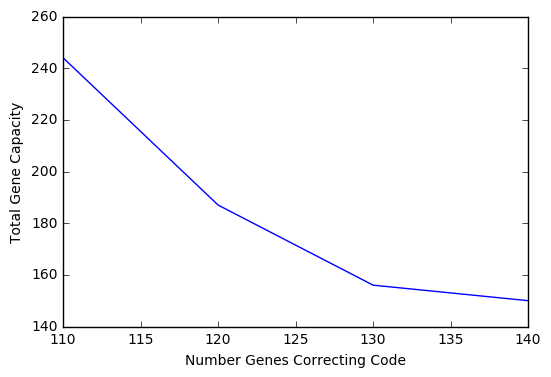

In [35]:
corrected, total = zip(*code_scaling)
plt.plot(corrected, total)
plt.xlabel('Number Genes Correcting Code')
plt.ylabel('Total Gene Capacity')

In [22]:
write_codebook(cwords, './cbook_140MHD4_200MHD2.txt')

In [26]:
cwords = purge_badwords(codewords, stringency_switch=140)
cwords.shape

(154, 18)

In [254]:
code_scaling = []
for i in range(120, 140, 2):
    cwords = codewords.copy()
    cwords = purge_badwords(cwords, stringency_switch=i)
    counts = Counter(np.sum(cwords, axis=1))
    code_scaling.append((i, counts[4.0]))
    print(counts)

Counter({4.0: 428})
Counter({4.0: 412})
Counter({4.0: 396})
Counter({4.0: 380})
Counter({4.0: 364})
Counter({4.0: 340})
Counter({4.0: 296})
Counter({4.0: 268})
Counter({4.0: 240})
Counter({4.0: 216})


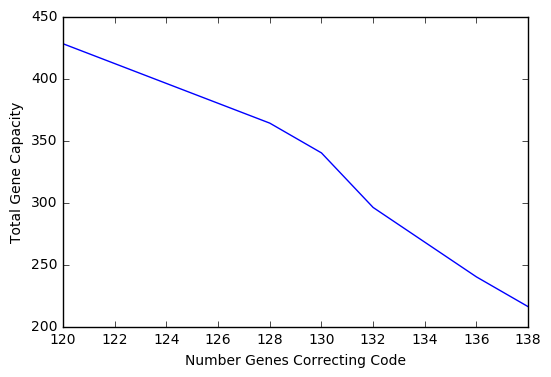

In [255]:
corrected, total = zip(*code_scaling)
plt.plot(corrected, total)
plt.xlabel('Number Genes Correcting Code')
plt.ylabel('Total Gene Capacity')

In [252]:
min_dists = []
for i, c in enumerate(cwords):
    min_dist = []
    for j in range(i+1, cwords.shape[0]):
        min_dist.append(hamming(c, cwords[j, :]))
    try:
        min_dists.append(np.amin(min_dist)*number_bits)
    except:
        continue

In [270]:
cwords = purge_badwords(codewords, stringency_switch=125)
min_dists = []
ave_dist = []
prc90_dist = []
for i, c in enumerate(cwords):
    min_dist = []
    for j in range(cwords.shape[0]):
        if i==j:
            continue
        min_dist.append(hamming(c, cwords[j, :]))
    try:
        min_dists.append(np.amin(min_dist)*number_bits)
        ave_dist.append(np.mean(min_dist)*number_bits)
        prc90_dist.append(np.percentile(min_dist, )*number_bits)
    except:
        continue
Counter(min_dists)

Counter({2.0: 263, 4.0: 125})

(array([ 263.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  125.]),
 array([ 2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ]),
 <a list of 10 Patch objects>)

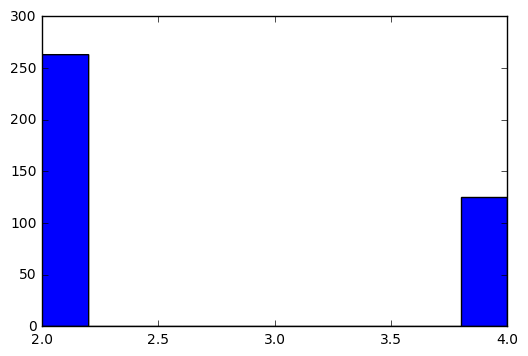

In [271]:
plt.hist(prc90_dist)

In [17]:
cwords[0, :]

array([ 1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

In [281]:
len(min_dist)

387